In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

n = 4 

X, y, coef = make_regression(
    n_samples=100000,
    n_features=30-n,
    n_informative=5,
    n_targets=1,
    bias=10.0,
    effective_rank=None,
    tail_strength=0.5,
    noise=1.0,
    shuffle=True,
    coef=True,
    random_state=42
)

# Зберегти набір даних у форматі .csv
data = pd.DataFrame(np.column_stack((X, y)))
data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.396242,-1.463158,0.428783,0.709680,0.175822,-0.546358,-0.107098,2.429400,-0.639883,1.682657,...,-0.556837,-1.042008,0.572976,-0.238112,-0.489228,-0.984768,1.551740,2.123053,0.673468,-17.006781
1,-0.302668,0.349573,-0.608108,0.687312,-1.098077,0.156644,-0.157795,-2.221376,1.054265,0.454147,...,-0.093846,-1.027883,0.205495,-0.759163,-2.354465,1.099064,-1.569040,2.358743,-0.273776,-21.691657
2,1.343230,0.182842,1.067991,-0.688302,-0.247161,0.488288,-0.602814,0.305333,0.056730,-0.484819,...,0.742575,-0.731167,0.538733,0.146049,-1.153611,0.411101,1.136533,0.842538,0.517058,47.480212
3,-1.036185,-0.278631,0.399161,-1.081390,-0.257234,-0.094051,1.202290,-0.930317,0.214864,1.642964,...,-1.086072,0.357430,0.408787,-0.054801,-0.251728,-1.324642,1.183465,-0.857395,0.093112,-2.558381
4,1.551582,-0.693816,-1.590591,-0.157151,-1.379150,-0.049207,-0.501588,-2.490562,0.418523,-0.674085,...,-1.330913,1.431930,1.016227,-0.006257,0.443285,0.137431,-0.210878,1.648011,-1.328531,-28.158273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.843239,-0.386273,0.628628,0.569016,0.910159,-0.043258,-0.711294,-1.196111,0.164693,-0.083295,...,-0.497636,-0.237605,-1.020333,0.777112,2.284902,-0.017734,-0.355950,-0.687105,0.124984,56.300410
99996,0.941356,-0.208443,-1.605566,0.812687,-0.027481,-0.553532,-0.978339,-0.629401,2.073606,-1.941686,...,-1.437606,-1.175191,0.757469,-0.072179,1.780119,0.008512,-1.056809,0.051966,-0.078579,-85.971962
99997,0.805784,1.870189,0.395040,-0.071867,-0.557745,1.704090,-0.157611,-0.456569,0.072599,-0.951738,...,0.090515,1.451054,-0.702178,0.912313,-0.325616,-0.914122,-1.749443,0.467555,-0.312791,172.345138
99998,-1.316624,-0.252004,1.026903,-0.848741,1.629245,-1.090426,0.675402,1.942864,-1.559207,0.213154,...,-0.513846,2.070013,0.347664,-0.066582,-0.539132,0.444958,-0.281346,-0.137140,-1.286848,-8.746496


In [ ]:
data.to_csv('generated_data.csv', index=False)

Mean Squared Error: 1.03


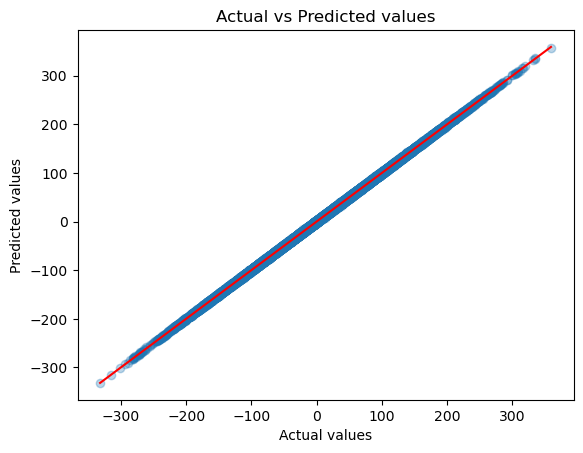

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Розділити набір даних на тренувальний та тестовий
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створити та навчити модель лінійної регресії
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Передбачити значення на тестових даних
y_pred = regression_model.predict(X_test)

# Обчислити середньоквадратичну помилку
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Візуалізація результатів
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.show()
